<a href="https://colab.research.google.com/github/Guillermina0406/Machine-Learning/blob/main/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### REGRESIÓN Y CLASIFICACIÓN

#### ALGORITMOS QUE UTILIZAN:

In [ ]:
import pandas as pd
import numpy as np
students=pd.read_csv("estudiantes_limpio.csv")
students

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,females,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,1,1,72,72,74,1,0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,0,69,90,88,1,0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,1,90,95,93,1,0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,47,57,44,0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,2,1,1,76,78,75,0,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,4,1,0,88,99,95,1,0,0.0,0.0,0.0,1.0,0.0,0.0
980,2,0,1,62,55,55,0,1,0.0,0.0,1.0,0.0,0.0,0.0
981,2,0,0,59,71,65,1,0,0.0,0.0,1.0,0.0,0.0,0.0
982,3,1,0,68,78,77,1,0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
students.isnull().sum()

race/ethnicity             0
lunch                      0
test preparation course    0
math score                 0
reading score              0
writing score              0
associate's degree         0
bachelor's degree          0
high school                0
master's degree            0
some college               0
some high school           0
dtype: int64

Ahora tenemos que decidir qué variable o variables vamos a predecir. Esto quiere decir que tenemos que elegir cual va a ser la variable que al predecirla conteste la pregunta que nos hicimos de los datos.

Lo que queremos saber es: <br/>
> 1.¿Qué puntaje final obtendrá un estudiante?<br/>
> 2.Dado un estudiante, ¿aprobará o no el examen?

##### ¿Qué tipo de problema estamos tratando de resolver?

Para contestar estas preguntas vamos a obtener dos nuevas variables:<br/>
* 1.El puntaje final: Lo obtendremos promediando los tres puntajes (matemáticas, lectura y escritura)
* 2.Aprobado: Una etiqueta que me permita saber si cada estudiante del dataset aprobo el examen (puntaje final=>60) o no lo aprobo (puntaje < 60).

In [ ]:
students['puntaje_final']=(students['reading score']+students['writing score']+students['math score'])/3

#### Regresión Múltiple

Comenzamos contestando la pregunta 1. Este problema es un problema de regresión (¿Por qué?)

#### Selección de target (y) y variables (x)

Lo primero que haremos, es seleccionar las variables o features que deseemos usar como variable independientes (aquellas que van a explicar mi predicción) y la variable a predecir.<br/>
Usaremos todas las variables menos aquellas que fueron usadas para calcular el puntaje final. Debemos también asegurarnos de no incluir las variables a predecir. Como variable a predecir usaremos el puntaje final.

In [ ]:
#Elimino aquellas variables que no quiero incluir en el modelo y las guardo en x:
x=students.drop(['math score','reading score', 'writing score','puntaje_final'], axis=1)

In [ ]:
x

,race/ethnicity,lunch,test preparation course,females,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,1,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,2,1,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
979,4,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
980,2,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0
981,2,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0
982,3,1,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
lista_atributos=x.columns

In [ ]:
# Ahora selecciono las etiquetas y las guardo en y.
y=students['puntaje_final']

In [ ]:
x,y=np.array(x), np.array(y)
# porque e smás fácil trabajar con un array para el modelo

In [ ]:
x

array([[1., 1., 1., ..., 0., 0., 0.],
       [2., 1., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [3., 1., 0., ..., 0., 1., 0.],
       [3., 0., 1., ..., 0., 1., 0.]])

In [ ]:
y[:10]

array([72.66666667, 82.33333333, 92.66666667, 49.33333333, 76.33333333,
       77.33333333, 91.66666667, 40.66666667, 65.        , 49.33333333])

#### Separando Train / Test

Ahora tenemos que separar el dataset en conjuntos de entrenamiento (X_train, y_train) y de testeo (X_test, y_test) usando la función train_test_split de scikit-learn.<br/>

¿Por qué seprarnos el dataset? Porque es necesario entrenar ek modelo con un set de datos. El modelo no puede ver los datos de evaluación cuando se esta entrenando!
La forma en que se dividen los datos normalmente es 80% entrenamiento - 20% evaluación)

In [ ]:
# Importamos la librería para separar el dataset
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x.shape

(984, 11)

In [ ]:
X_train.shape

(787, 11)

#### Árboles de decisión -  Random Forest

Recordemos que Random Forest es un algoritmo de ensamble. Hay dos técnicas para esto: Bagging y Boosting.<br/>

El objetivo de bagging es entrenar distintos modelos, donde cada uno vea distintas porciones del entrenamiento. <br/>
Random Forest, además de aplicar Bagging, también selecciona features al azar, de esa manera descorrelaciona aún más los distintos modelos de árbol creados.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# Inicializo el modelo criterioon: absolute_error
regresor= RandomForestRegressor(criterion='absolute_error', random_state=42)#"mse" para el error cuadrático medio o, mae error absoluto medio

Mean Absolute Error (MAE): This measures the absolute average distance between the real data and the predicted data, but it fails to punish large errors in prediction.<br/>
Mean Square Error (MSE): This measures the squared average distance between the real data and the predicted data.Here, larger errors are well noted (better than MAE). But the disadvantage is that it also squares up the units of data as well. So, evaluation with different units is not at all justified.<br/>
InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}. Got 'mae' instead.

In [ ]:
# Entreno el modelo
regresor.fit(X_train, y_train);

In [ ]:
regresor.get_params()
# Bootstrap: cada vez que selecciono un subset de datos para aplicar un algoritmo, vuelvo a elegir los datos del siguiente o no.
# max_features: cuántos features elijo en cada uno de los árboles
# n_estimators cant de árboles que utilizo para entrenar el modelo
#

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Evaluación del modelo

In [ ]:
# Predigo los valores para el set de testeo
y_pred=regresor.predict(X_test)

In [ ]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

11.090752961082913

In [ ]:
# Calculo el error porcentual medio
np.mean((np.abs(y_pred - y_test)/y_test)*100)

17.845828315064725

In [ ]:
# Predigo los valores para el set de training
y_pred_train=regresor.predict(X_train)

In [ ]:
mean_absolute_error(y_train, y_pred_train)
# si el error de entranmiento es más bajo que el error de testeo, existe overfiting

8.165908513341805

In [ ]:
# Calculo el error porcentual medio promedio para el entrenamiento
np.mean((np.abs(y_train-y_pred_train)/y_train)*100)

12.6567540589499

Obtenemos la importancia de cada feature usando feature_importances_.

In [ ]:
for x,y in list(zip(lista_atributos, regresor.feature_importances_)):
    print(f'Atributo:{x}, Importancia:{y}')

Atributo:race/ethnicity, Importancia:0.3213732979421006
Atributo:lunch, Importancia:0.11311610447642817
Atributo:test preparation course, Importancia:0.09888054279083844
Atributo:females, Importancia:0.06422198022815341
Atributo:male, Importancia:0.07034231036787507
Atributo:associate's degree, Importancia:0.057637633484028415
Atributo:bachelor's degree, Importancia:0.055642589438526
Atributo:high school, Importancia:0.06051084256958122
Atributo:master's degree, Importancia:0.045017266386332896
Atributo:some college, Importancia:0.053000571200088144
Atributo:some high school, Importancia:0.06025686111604767


In [ ]:
np.mean(y_train)

68.77678949597629

#### ¿Podemos aceptar un modelo que prediga con un 20% de error? ¿Qué podemos hacer ahora para mejorar nuestro modelo?

Recordemos que utilizamos un algoritmo de  regresión, por lo tanto, vamos a usar los errores para poder evaluar el desempeño de nuestro modelo. Primero creemos unas funciones que nos permitirán obtener errores facilmente y graficar los resultados.

In [ ]:
def evaluation(y_test, predictions):
    """
    Funcion que devuelve el absoluto medio y el error porcentual absoluto medio.
    :param y_test: valores realese
    :param predictions:valores predichos

    :return: Devuelve el error absoluto medio y el error porcentual absoluto medio.
    """
    #Calcula mae
    mae=mean_absolute_error(y_test, predictions)
    #calculate mape
    mape=np.mean((np.abs(y_test-predictions)/y_test)*100)
    #print calculated values
    print(f"El error absoluto medio para el modelo es {round(mae, 2)}")
    print(f"El error porcentual absoluto medio para el modelo es {round(mape, 2)}")

In [ ]:
def graph_real_pred(y_test, predictions, color):
    """
    Funcion que grafica los valores reales vs. predichos
    :param y_test:valores reales
    :param predictions: valores predichos
    :param color: color para el plot.

    :return: Scatterplot mostrando la relacion entre el valor real y el predicho
    """
    plt.scatter(y_test, predictions, c=color, s=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel('Real', size=15, labelpad=1)
    plt.ylabel('Predicted', size=15, labelpad=1)
    plt.show()

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def feature_importance(model, feature_list):
    """
    Function that gets and plots the feature importance for the given model
    :param model: the model to evaluate
    :param feature _list: a list of features contained in the model

    :returns a plot with feature importance
    """

    #Obtiene la lista de importancias
    importances=list(model.feature_importances_)
    # Junta los nombres de los atributos y las importancias
    feature_importances=[(feature, round(importance, 2)) for feature, importance in zip (feature_list, importances)]
    # Ordena por orden de importancia
    feature_importances=sorted(feature_importances, key=lambda x:x[1], reverse=True)
    # Print la lista de importancias
    [print ('Variable: {} Importance:{}'.format(*pair)) for pair in feature_importances];
    # Colores
    colors= plt.cm.rainbow(np.linspace(0,1, len (feature_list)))

    # Caracteríticas en orden de importancia
    characteristics=[x[0] for x in feature_importances]
    # Obtiene las importancias
    importances_plot=[x[1] for x in feature_importances]
    # Grafica un bar plot
    plt.bar(characteristics, importances_plot, color=colors)
    # Personalizamos el grafico
    plt.xticks(list(range(len(characteristics))), characteristics, rotation=90)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gcf().subplots_adjust(bottom=0.3);

#### Buscando mi modelo

Lo primero que podemos hacer es tratar de optimizar los parametros del Random Forest. Para eso podemos revisar en la documentación que parámetros se pueden optimizar.

De manera de hacer una búsqueda, utilizaremos la función GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Valores para los parámetros a optimizar
param_grid_rf={
    'criterion':['absolute_error'],
    'n_estimators':[70,80,90,100,120],
    'max_features':['log2','sqrt'],
    'max_depth':[1,3,5,10,20,50],
    'min_samples_leaf':[1,3,5,10,20,50]
}

modelo 1: mae, 70, log2, 1, 1 --> CV=5 <br/>
modelo 2: mae, 80, log2, 1, 1

In [ ]:
#Inicializamos un modelo
grid_regresor=RandomForestRegressor(random_state=42)

In [ ]:
# Creamos la busqueda
rf_search=GridSearchCV(estimator=grid_regresor, param_grid=param_grid_rf, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

In [ ]:
# Corremos el gridsearch con una variación usando 3 folds.
rf_search.fit(X_train, y_train)
# arroja 5 iteraciones de cada una de la combinación de los parámetros

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [1, 3, 5, 10, 20, 50],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10, 20, 50],
                         'n_estimators': [70, 80, 90, 100, 120]},
             scoring='neg_mean_absolute_error', verbose=2)

#### ¿Cuál es nuestro mejor estimador?

In [ ]:
rf_search.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      max_features='log2', min_samples_leaf=5, n_estimators=90,
                      random_state=42)

In [ ]:
rf_search.best_score_

-9.909911326710086

In [ ]:
# Asignamos el mejor estimator a mejor_regresor
mejor_regresor=RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      max_features='log2', min_samples_leaf=5, n_estimators=90,
                      random_state=42)

In [ ]:
# Entrenamos el modelo
mejor_regresor.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      max_features='log2', min_samples_leaf=5, n_estimators=90,
                      random_state=42)

In [ ]:
# Hacemos la predicción para el test de evaluación
predicciones=mejor_regresor.predict(X_test)

In [ ]:
# Error
evaluation(y_test, predicciones)

El error absoluto medio para el modelo es 10.0
El error porcentual absoluto medio para el modelo es 16.34


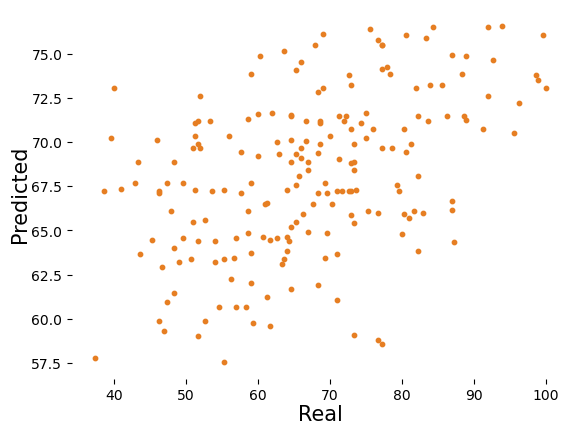

In [ ]:
import matplotlib.pyplot as plt
# Correlacion
graph_real_pred(y_test, predicciones, color='#E67E22')

Variable: lunch Importance:0.28
Variable: test preparation course Importance:0.21
Variable: race/ethnicity Importance:0.19
Variable: high school Importance:0.06
Variable: females Importance:0.05
Variable: some high school Importance:0.05
Variable: male Importance:0.04
Variable: master's degree Importance:0.03
Variable: associate's degree Importance:0.02
Variable: bachelor's degree Importance:0.02
Variable: some college Importance:0.02


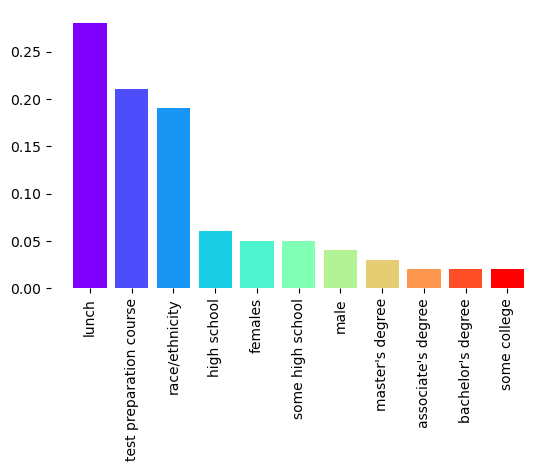

In [ ]:
# Importancia de cada feature
feature_importance(mejor_regresor, lista_atributos)

## Clasificación

Contestaremos ahora la pregunta 2. Este problema es un problema de clasificación (¿Por qué?)<br/>

Lo primero que veremos es si tenemos un desbalance de clases. Es muy importante ver que no tenemos una clase minoritaria, ya que esto afectaría el algoritmo. En nuestro caso, que trabajamos con una clasificación binaria, tener un desbalance de clases implica que tenemos del 10% de nuestros datos que pertenecen a una de las clases.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
students=pd.read_csv("estudiantes_limpio.csv")
students

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,females,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,1,1,72,72,74,1,0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,0,69,90,88,1,0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,1,90,95,93,1,0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,47,57,44,0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,2,1,1,76,78,75,0,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,4,1,0,88,99,95,1,0,0.0,0.0,0.0,1.0,0.0,0.0
980,2,0,1,62,55,55,0,1,0.0,0.0,1.0,0.0,0.0,0.0
981,2,0,0,59,71,65,1,0,0.0,0.0,1.0,0.0,0.0,0.0
982,3,1,0,68,78,77,1,0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
students['puntaje_final']=(students['reading score']+students['writing score']+students['math score'])/3

In [ ]:
students['aprobado']=students['puntaje_final'].apply(lambda x: 0 if x<60 else 1)

In [ ]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,females,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,puntaje_final,aprobado
0,1,1,1,72,72,74,1,0,0.0,1.0,0.0,0.0,0.0,0.0,72.666667,1
1,2,1,0,69,90,88,1,0,0.0,0.0,0.0,0.0,1.0,0.0,82.333333,1
2,1,1,1,90,95,93,1,0,0.0,0.0,0.0,1.0,0.0,0.0,92.666667,1
3,0,0,1,47,57,44,0,1,1.0,0.0,0.0,0.0,0.0,0.0,49.333333,0
4,2,1,1,76,78,75,0,1,0.0,0.0,0.0,0.0,1.0,0.0,76.333333,1


In [ ]:
students.shape

(984, 16)

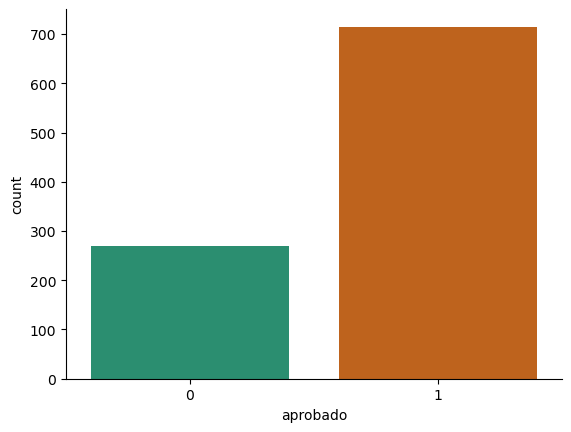

In [ ]:
sns.countplot(x=students['aprobado'], palette='Dark2')
sns.despine()
# tenemos que mirar si hay desbalance de clase

In [ ]:
students['aprobado'].value_counts()/students['aprobado'].size*100

1    72.662602
0    27.337398
Name: aprobado, dtype: float64

Como vemos que no hay desbalance podemos continuar

#### Selección de target(y) y variable (X)

Ahora seleccionaremos las variables o features que deseemos usar como variable independientes y la variable a predecir. <br/>

Usaremos todas las variables menos aquellas que fueron usadas para calcular el puntaje final. Debemos también asegurarnos de no incluir las variables a predecir. Como variable a predecir usaremos __aprobado__.

In [ ]:
xc=students.drop(['math score', 'reading score','writing score','puntaje_final','aprobado'], axis=1)

In [ ]:
xc

,race/ethnicity,lunch,test preparation course,females,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,1,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0
4,2,1,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
979,4,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
980,2,0,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0
981,2,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0
982,3,1,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
yc=students['aprobado']

In [ ]:
yc

0      1
1      1
2      1
3      0
4      1
      ..
979    1
980    0
981    1
982    1
983    1
Name: aprobado, Length: 984, dtype: int64

In [ ]:
xc, yc=np.array(xc), np.array(yc)

In [ ]:
xc.shape

(984, 11)

In [ ]:
yc.shape

(984,)

#### Separando Train/Test

Separamos nuevamente el dataset en entrenamiento y testeo o evaluación.

In [ ]:
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_test_c, y_train_c=train_test_split(xc, yc, test_size=0.5, random_state=42)

In [ ]:
X_test_c.shape

(492, 11)

In [ ]:
y_test_c.shape

(492,)

In [ ]:
y_train_c.shape

(492,)

In [ ]:
X_train_c.shape

(492, 11)

#### Clasificador KNN

Para realizar la clasificación utilizaremos el algoritmo  de los k-vecinos más cercanos.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# métricas
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
# Entrenamos el modelo
knn.fit(X_train_c,y_train_c);

In [ ]:
# Predecimos
predicciones_cla=knn.predict(X_test_c)

In [ ]:
predicciones_train=knn.predict(X_train_c)

In [ ]:
accuracy=accuracy_score(y_train_c, predicciones_train)*100
print(f'{round(accuracy, 2)}%')

77.44%


In [ ]:
accuracy=accuracy_score(y_test_c, predicciones_cla)*100
print(f'{round(accuracy, 2)}%')

68.9%


#### Buscando mi modelo

Ahora vamos a optimizar los parámetros del clasificador kNN. Para eso podemos revisar en la documentación qué parámetros se puede optimizar.<br/>

Vamos a buscar el mejor k:

In [ ]:
ACC_train=[]
ACC_test=[]
vecinos=[1,3,5,10,15,20,25,30]
for n in vecinos:
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train_c, y_train_c)
    y_train_pred=clf.predict(X_train_c)
    train_acc=accuracy_score(y_train_c, y_train_pred)
    ACC_train.append(train_acc)
    y_test_pred=clf.predict(X_test_c)
    test_acc=accuracy_score(y_test_c, y_test_pred)
    ACC_test.append(test_acc)

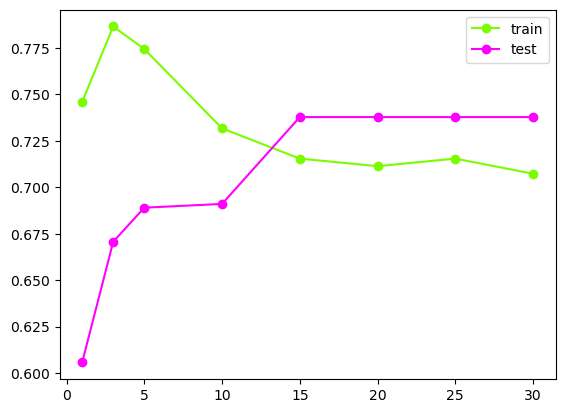

In [ ]:
plt.plot(vecinos, ACC_train, 'o-', label='train', color='lawngreen')
plt.plot(vecinos, ACC_test, 'o-', label='test', color='fuchsia')
plt.legend()

In [ ]:
# Valores para los parámetros a optimizar
param_grid_vec={
    'n_neighbors':[18,20,22],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan'],
}

In [ ]:
knn_search=KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
vecinos_search=GridSearchCV(estimator=knn_search, param_grid=param_grid_vec, cv=3, verbose=2, n_jobs=-1)

In [ ]:
vecinos_search.fit(X_train_c, y_train_c)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [18, 20, 22],
                         'weights': ['uniform', 'distance']},
             verbose=2)

#### ¿Cuál es nuestro mejor estimador?

In [ ]:
vecinos_search.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=22)

In [ ]:
vecinos_search.best_score_

0.7073170731707318

In [ ]:
knn_best=vecinos_search.best_estimator_

In [ ]:
knn_best.fit(X_train_c, y_train_c)

KNeighborsClassifier(metric='euclidean', n_neighbors=22)

In [ ]:
new_prediction=knn_best.predict(X_test_c)

#### Métricas

Matriz de confusión <br/>

True Negative (TN)| False Positive (FP)<br/>
==============================<br/>
False Negative (FN)| True Positive (TP)

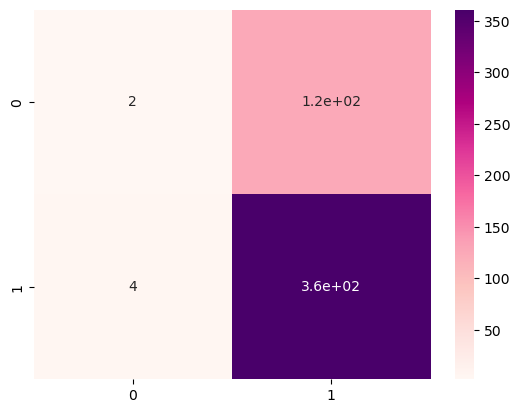

In [ ]:
plt.figure()
random_confusion=confusion_matrix(y_test_c, new_prediction)
sns.heatmap(random_confusion, cmap="RdPu", annot=True);

In [ ]:
print(f"Accuracy: {accuracy_score(y_test_c, new_prediction)*100:.2f}%")
print(f"Precision: {precision_score(y_test_c, new_prediction)*100:.2f}%")
print(f"Recall: {recall_score(y_test_c, new_prediction)*100:.2f}%")
print(f"f1 score: {f1_score(y_test_c, new_prediction)*100:.2f}%")

Accuracy: 73.78%
Precision: 74.28%
Recall: 98.90%
f1 score: 84.84%


In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors

#### Support Vector Machine